In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from tqdm import tqdm
np.random.seed(2022)

In [2]:
path = "/ocean/projects/atm200007p/jlin96/longSPrun/"
subFolders = !ls
files = [path + x for x in subFolders if "nnInput" in x]
files

['/ocean/projects/atm200007p/jlin96/longSPrun/nnInput_01.npy',
 '/ocean/projects/atm200007p/jlin96/longSPrun/nnInput_02.npy',
 '/ocean/projects/atm200007p/jlin96/longSPrun/nnInput_03.npy',
 '/ocean/projects/atm200007p/jlin96/longSPrun/nnInput_04.npy',
 '/ocean/projects/atm200007p/jlin96/longSPrun/nnInput_05.npy',
 '/ocean/projects/atm200007p/jlin96/longSPrun/nnInput_06.npy',
 '/ocean/projects/atm200007p/jlin96/longSPrun/nnInput_07.npy',
 '/ocean/projects/atm200007p/jlin96/longSPrun/nnInput_08.npy',
 '/ocean/projects/atm200007p/jlin96/longSPrun/nnInput_09.npy',
 '/ocean/projects/atm200007p/jlin96/longSPrun/nnInput_10.npy',
 '/ocean/projects/atm200007p/jlin96/longSPrun/nnInput_11.npy',
 '/ocean/projects/atm200007p/jlin96/longSPrun/nnInput_12.npy']

In [3]:
def sampleIndices(size, spacing, fixed = True):
    numIndices = np.round(size/spacing)
    if fixed:
        indices = np.array([int(x) for x in np.round(np.linspace(1,size,int(numIndices)))])-1
    else:
        indices = list(range(size))
        np.random.shuffle(indices)
        indices = indices[0:int(numIndices)]
    return indices

def shrinkArray(nnData, spacing):
    nnData = nnData[:,:,:,sampleIndices(nnData.shape[3], spacing, True)]
    nnData = nnData.ravel(order = 'F').reshape(184,-1,order = 'F')
    return nnData

def splitArray(nnData, variant):
    if variant == 0:
        nnInput = nnData[0:64,:]
    if variant == 1:
        nnInput = np.concatenate((nnData[:30,:],nnData[64:94,:], nnData[60:64,:]))
    #nnTarget = nnData[124:,:]
    nnVariant = np.concatenate((nnInput, nnData[124:,:]))
    return nnVariant

def reorderArray(nnData):
    canonical = np.concatenate([nnData[0:30,:], \
                                nnData[30:60,:], \
                                nnData[62:63,:], \
                                nnData[63:64,:], \
                                nnData[61:62,:], \
                                nnData[60:61,:], \
                                nnData[64:94,:], \
                                nnData[94:124,:]], axis = 0)
    return canonical

In [22]:
datasets = []
for arr in tqdm(files):
    with open(arr, 'rb') as f:
        nnData = np.load(f)
        nnData = nnData[:,:-1,:,:] # this was to account for the weird humidity error at the end.
    datasets.append(shrinkArray(nnData, 5))
    del nnData
combinedData = np.concatenate(datasets, axis = 1)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [17:16<00:00, 86.37s/it]


In [23]:
del datasets

In [24]:
combinedData.shape

(184, 28314624)

In [25]:
averagedCombined = np.mean(combinedData, axis = 1)

In [26]:
averagedCombined.shape

(184,)

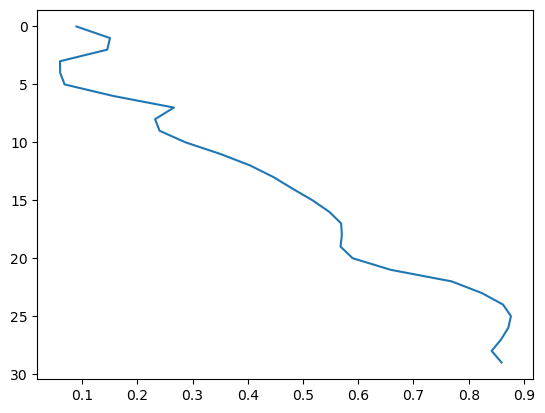

In [27]:
#calculated relative humidity
plt.plot(averagedCombined[64:94], range(30))
plt.gca().invert_yaxis()

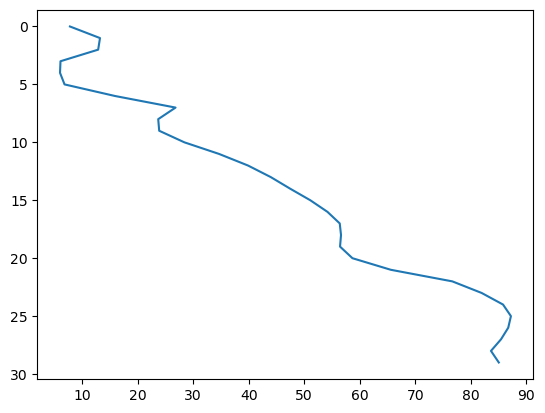

In [28]:
#SP Reference relative humidity
plt.plot(averagedCombined[94:124], range(30))
plt.gca().invert_yaxis()

# Save specific data

In [11]:
arr_specific = splitArray(combinedData, 0)
print("specific loaded")
# arr_relative = splitArray(combinedData, 1)
# print("relative loaded")
del combinedData

specific loaded


In [12]:
arr_specific.shape

(124, 28314624)

In [13]:
rearrangedSpecific = reorderArray(arr_specific)
del arr_specific

In [14]:
rearrangedSpecific.shape

(124, 28314624)

In [15]:
averagesSpecific = np.mean(rearrangedSpecific, axis = 1)

In [16]:
averagesSpecific.shape

(124,)

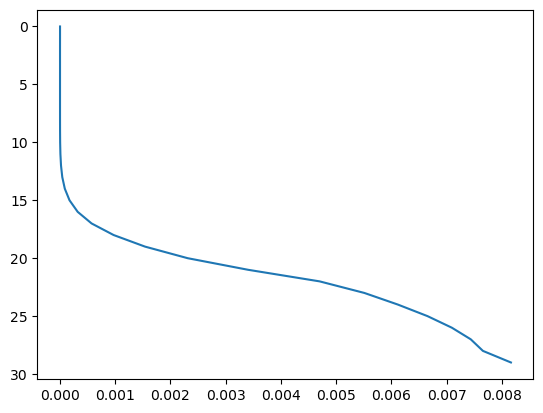

In [17]:
plt.plot(averagesSpecific[30:60], range(30))
plt.gca().invert_yaxis()

In [18]:
del averagesSpecific

In [19]:
path = "/ocean/projects/atm200007p/jlin96/nnIngredientFactory/preprocessing/ingredientsLong/"

with open(path + 'nnDataSpecific_long_5.npy', 'wb') as f:
    np.save(f, rearrangedSpecific)

In [20]:
print("finished")

finished


In [21]:
del rearrangedSpecific

# Save relative data

In [29]:
arr_relative = splitArray(combinedData, 1)
print("relative loaded")
del combinedData

relative loaded


In [30]:
arr_relative.shape

(124, 28314624)

In [31]:
rearrangedRelative = reorderArray(arr_relative)
del arr_relative


In [32]:
rearrangedRelative.shape

(124, 28314624)

In [33]:
averagesRelative = np.mean(rearrangedRelative, axis = 1)

In [34]:
averagesRelative.shape

(124,)

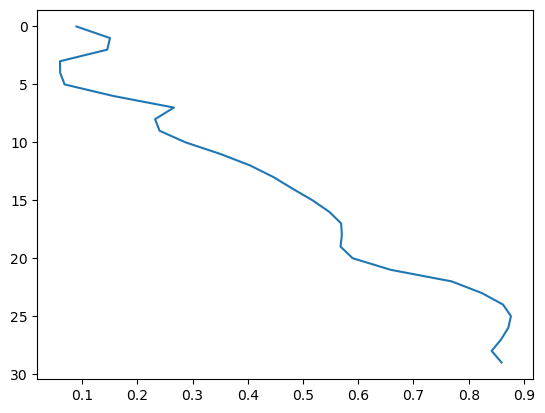

In [35]:
plt.plot(averagesRelative[30:60], range(30))
plt.gca().invert_yaxis()

In [36]:
del averagesRelative

In [37]:
path = "/ocean/projects/atm200007p/jlin96/nnIngredientFactory/preprocessing/ingredientsLong/"

with open(path + 'nnDataRelative_long_5.npy', 'wb') as f:
    np.save(f, rearrangedRelative)

In [38]:
print("finished")

finished


In [39]:
del rearrangedRelative